# T1.2

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

# Parkinson Dataset

# **Matrix column entries (attributes):**

name - ASCII subject name and recording number

1. MDVP:Fo(Hz) - Average vocal fundamental frequency
2. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
3. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
4. MDVP:Jitter(%),
5. MDVP:Jitter(Abs),
6. MDVP:RAP,
7. MDVP:PPQ,
8. Jitter:DDP

Several 
measures of variation in fundamental frequency
9. MDVP:Shimmer,
10. MDVP:Shimmer(dB),
11. Shimmer:APQ3,
12. Shimmer:APQ5,
13. MDVP:APQ,
14. Shimmer:DDA

Several measures of variation in amplitude

15. NHR,
16. HNR 

Two measures of ratio of noise to tonal components in the voice
17. status

Health status of the subject (one) - Parkinson's, (zero) - healthy
18. RPDE,             D2 - Two nonlinear dynamical complexity measures
19. DFA                Signal fractal scaling exponent
20. spread1,
21. spread2,
22. PPE                Three nonlinear measures of fundamental frequency variation 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import random
import warnings
warnings.filterwarnings('ignore')

# Seed

In [41]:
seed = 1289302
random.seed(seed)

# Plot configuration

In [42]:
%matplotlib inline 
plt.rc('font', family='Arial')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Pegando o dataset

In [43]:
dfParkinson = pd.read_csv('parkinson.csv')
print(dfParkinson.shape)
print(dfParkinson.columns)
dfParkinson.head()

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Entendendo os tipos dos dados
Os dados são em sua grande maioria números, oque facilita bastante

In [44]:
dfParkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

O que queremos é de fato saber se a pessoa tem ou não parkinson. Essa informação é dada pelo atributo 'status' onde:

0 -> não possui

1 -> possui

Sendo representado por tanto por healthy e Parkinson's respectivamente.
No caso o dataset possui 48 pessoas saudáveis e 147 pessoas com Parkinson, oque é não é muito bom pois está bastante discrepante a distribuição. O ideal seria que a quantidade de amostras tivessem mais proximidade

In [45]:
outcome_column = 'status'
# status: 0: healthy, 1: Parkinson's
outcome_labels = {0: 'Healthy', 1:'Parkinson`s'}
label_counts = np.bincount(dfParkinson.status)
x = range(len(outcome_labels))
y = list(label_counts)
print("Healthy quantity: ", y[0])
print("Parkinson`s quantity: ", y[1])

Healthy quantity:  48
Parkinson`s quantity:  147


# Plot quantidade de pessoas

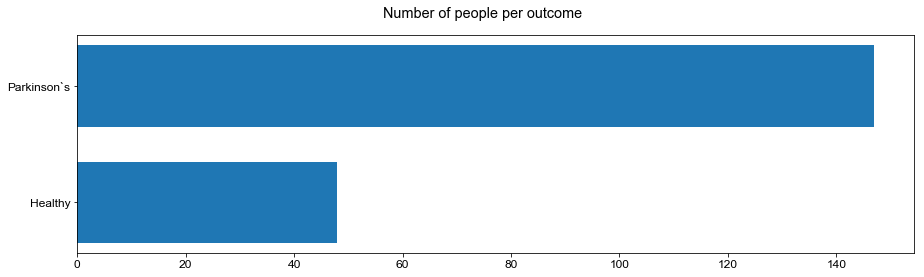

In [46]:
fig = plt.figure(figsize=(15,4))
plt.barh(x, y, height=0.7)
plt.yticks(x, outcome_labels.values())
fig.suptitle('Number of people per outcome')
plt.show()

Agora que já entendemos qual os tipos dos dados do dataset e tivemos uma visão geral sobre como está a distribuição dos dados em relação ao nosso objetivo, vamos definir quais os atributos serão utilizados para fazer a nossa predição.

Nesse caso, removeremos apenas os campos de texto 'status' e 'name', o resto são campos numéricos que serão utilizados.

In [47]:
features = [col for col in dfParkinson.columns if col not in ['name', 'status']]
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

# Separando os dados entre modelo de teste e modelo de treino

com o test_size = 0.15 obtemos:

Dados de treino:  165 165

Dados de teste:  30 30

In [48]:
from sklearn.model_selection import train_test_split

# separando dados de treino e de teste (15% de teste)
dfTrain, dfTest = train_test_split(dfParkinson, test_size=0.15, 
                                   stratify=dfParkinson[outcome_column],random_state=seed)

# convertemos dataframe de features e labels em arrays
X_train = np.array(dfTrain[features])
Y_train = np.array(dfTrain[outcome_column])
print("Dados de treino: ", X_train.shape[0], Y_train.shape[0])

# convertemos dataframe de features e labels em arrays
X_test = np.array(dfTest[features])
Y_test = np.array(dfTest[outcome_column])

# Imprimimos as dimensões das massas de teste
print("Dados de teste: ", X_test.shape[0], Y_test.shape[0])

Dados de treino:  165 165
Dados de teste:  30 30


Treinando o modelo K-nearest neighbor com 2 vizinhos

In [49]:
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics

# Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)

# Train the classifier with the train data
knn_model.fit(X_train,Y_train)

# Compute the prediction over the test data set according to the model
Yhat = knn_model.predict(X_test)

In [51]:
accuracy_train = knn_model.score(X_train, Y_train)
print('Acuracia encontrada nos dados de treino:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('Acuracia encontrada nos dados de teste:', '{:6.4f}'.format(accuracy_test))

Acuracia encontrada nos dados de treino: 0.9152
Acuracia encontrada nos dados de teste: 0.8667


# Adicionando vizinhos

In [62]:
dfParkinsonTrain, dfParkinsonTest = train_test_split(dfParkinson, test_size=0.15, stratify=dfParkinson[outcome_column],random_state=seed)

# convert feature dataframe and label series to arrays
X_train = np.array(dfParkinsonTrain[features])
Y_train = np.array(dfParkinsonTrain[outcome_column])
print("Dimensões de treino: ", X_train.shape[0], Y_train.shape[0])

# convert feature dataframe and label series to arrays
X_test = np.array(dfParkinsonTest[features])
Y_test = np.array(dfParkinsonTest[outcome_column])
print("Dimensões de teste: ", X_test.shape[0], Y_test.shape[0])

#Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=30)

#Train the classifier
knn_model.fit(X_train,Y_train)

#Compute the prediction according to the model
Yhat = knn_model.predict(X_test)

Dimensões de treino:  165 165
Dimensões de teste:  30 30


In [63]:
accuracy_train = knn_model.score(X_train, Y_train)
print('Acuracia encontrada nos dados de treino:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('Acuracia encontrada nos dados de teste:', '{:6.4f}'.format(accuracy_test))

Acuracia encontrada nos dados de treino: 0.7636
Acuracia encontrada nos dados de teste: 0.8000


# Apararentemente, 2 vizinhos retorna uma acuracia melhor que 30 vizinhos, mas, como vou saber qual a melhor configuração para o meu dataset?

Podemos configurar diversos algoritmos com ranges de configuração diferente e armazenar o melhor resultado de cada um para diversas configurações de dataset diferentes, dessa forma é mais facil identificar qual o parametro se sobressai mais (em termos de acuracia) no seu dataset.

# Validation pipeline

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

test_size = 0.2
n_folds = 3

def apply_validation_pipeline(name, model, params, X_train, y_train):
    pipe = Pipeline([('m', model)])
    grid = GridSearchCV(pipe, params, n_jobs=1, cv=n_folds)
    grid = grid.fit(X_train, y_train)

    print ("Model: "+ name)
    print ("Best cross-validation score: " + str(grid.best_score_))
    print ("Best parameters: " + str(grid.best_params_))
    return grid, grid.best_score_

def test_models(name, dataset_name, X_test, y_test, trained_model):
    predictions = trained_model.predict(X_test)
    print ("Model: "+ name)
    print ("Dataset: "+ dataset_name)
    test_accuracy = accuracy_score(y_test, predictions)
    print ("Accuracy score :" + str(test_accuracy))
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))
    return test_accuracy

# Agora vou configurar funcoes para executar varios algoritmos diferentes passando como parametro as variações em cada um.

LinearSVC {'m__C': [0.1, 1, 10], 'm__dual': [True, False]}

KNN {'m__n_neighbors': range(2,30)}

Decision Tree {'m__max_depth': range(3, 20)}

Gradient Boosting {'m__n_estimators': [100, 200, 300]}

Random Forest  { "m__n_estimators": [10, 30, 50, 70]}

Logistic Regression {}

SGD { 'm__alpha': (1e-2, 1e-3), m__max_iter': (1000, 2000),'m__penalty': ('l2',),}

In [55]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

models_params = [
    ('LinearSVC', LinearSVC(random_state=seed), {'m__C': [0.1, 1, 10], 'm__dual': [True, False]}),
    ('KNN', KNeighborsClassifier(), {'m__n_neighbors': range(2,30)}),
    ('Decision Tree', DecisionTreeClassifier(random_state=seed), {'m__max_depth': range(3, 20)}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=seed), {'m__n_estimators': [100, 200, 300]}),
    ('Random Forest', RandomForestClassifier(random_state=seed), { "m__n_estimators": [10, 30, 50, 70]}),
    ('Logistic Regression', LogisticRegression(), {}),
    ('SGD', SGDClassifier(random_state=seed), { 'm__alpha': (1e-2, 1e-3),
                                                'm__max_iter': (1000, 2000),
                                                'm__penalty': ('l2',),
                                               })
]

# Diferentes transformacoes no dataset


# Standardization
A padronização de conjuntos de dados é um requisito comum para muitos estimadores de aprendizado de máquina implementados no scikit-learn; eles podem se comportar mal se as características individuais não se parecerem mais ou menos com os dados padrão normalmente distribuídos.

Na prática, muitas vezes ignoramos a forma da distribuição e apenas transformamos os dados para centralizá-los, removendo o valor médio de cada recurso e, em seguida, dimensionamos dividindo recursos não constantes por seu desvio padrão.

Por exemplo, muitos elementos usados na função objetivo de um algoritmo de aprendizado assumem que todos os recursos estão centralizados em zero e têm variação na mesma ordem. Se um recurso tiver uma variância com ordens de magnitude maiores que outras, ele poderá dominar a função de objetivo e tornar o estimador incapaz de aprender com outros recursos corretamente, conforme o esperado.

Ex:

X_train = np.array( [ [ 1., -1.,  2. ] , [ 2. ,  0. ,  0. ] , [ 0. ,  1. , -1. ] ])

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaler.fit(X_train)

scaler.mean_  
array( [1. ... , 0. ... , 0.33... ] )

scaler.scale_                                       
array( [ 0.81... , 0.81... , 1.24... ] )

scaler.transform(X_train)                           
array ( [ [ 0.  ... , -1.22... ,  1.33... ],[  1.22... ,  0.  ... , -0.26... ] , [ -1.22... ,  1.22... , -1.06... ] ] )


# Normalize

Normalização é o processo de escalar amostras individuais para ter uma norma unitária. Esse processo pode ser útil se você planeja usar uma forma quadrática, como o produto de pontos para quantificar a similaridade de qualquer par de amostras.

Ex: 

X = [ [ 1. , -1. ,  2. ] , [ 2. ,  0. ,  0. ] , [ 0. ,  1. , -1. ] ]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized                                      
array( [ [ 0.40... , -0.40... ,  0.81... ],
       [ 1.  ... ,  0.  ... ,  0.  ... ],
       [ 0.  ... ,  0.70... , -0.70... ] ] )


# Variance Threshold after Normalizer
Este algoritmo de seleção de características olha apenas para os recursos (X), não para as saídas desejadas (y).

Ex: 

X = [ [ 0 , 2, 0, 3 ], [ 0, 1, 4, 3 ], [ 0, 1, 1, 3 ] ]

selector = VarianceThreshold()

selector.fit_transform(X)

array( [ [2 , 0 ],[ 1, 4 ],[ 1, 1 ] ] )

No caso ele removeu todos os atributos que eram iguais em todos os arrays


# PCA
O PCA é matematicamente definido como uma transformação linear ortogonal que transforma os dados para um novo sistema de coordenadas de forma que a maior variância por qualquer projeção dos dados fica ao longo da primeira coordenada (o chamado primeiro componente), a segunda maior variância fica ao longo da segunda coordenada, e assim por diante.

In [64]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Standard Scaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train) + 4 # prevent negative values
X_test_scaled = scaler.transform(X_test) + 4 # prevent negative values


# Normalizer

X_train_norm = normalize(X_train, axis=0)
X_test_norm = normalize(X_test, axis=0)


# Feature Selection - Variance Threshold after Normalizer 

sel = VarianceThreshold(threshold=0.0000005)
X_train_variance_threshold_10 = sel.fit_transform(X_train_norm)
X_test_variance_threshold_10 = sel.transform(X_test_norm)

sel = VarianceThreshold(threshold=0.000005)
X_train_variance_threshold_9 = sel.fit_transform(X_train_norm)
X_test_variance_threshold_9 = sel.transform(X_test_norm)


# PCA - Principal Component Analysis after Standard Scaler

pca16 = PCA(n_components=16)
X_train_pca16 = pca16.fit_transform(X_train_norm) + 4 # prevent negative values
X_test_pca16 = pca16.transform(X_test_norm) + 4 # prevent negative values

pca12 = PCA(n_components=12)
X_train_pca12 = pca12.fit_transform(X_train_norm) + 4 # prevent negative values
X_test_pca12 = pca12.transform(X_test_norm) + 4 # prevent negative values


datasets = [
    ('Default dataset', X_train, Y_train, X_test, Y_test),
    ('Standard Scaled dataset', X_train_scaled, Y_train, X_test_scaled, Y_test),
    ('Normalized dataset', X_train_norm, Y_train, X_test_norm, Y_test),
    ('Variance Threshold 10 features', X_train_variance_threshold_10, Y_train, X_test_variance_threshold_10, Y_test),
    ('Variance Threshold 9 features', X_train_variance_threshold_9, Y_train, X_test_variance_threshold_9, Y_test),
    ('PCA 16 components', X_train_pca16, Y_train, X_test_pca16, Y_train),
    ('PCA 12 components', X_train_pca12, Y_train, X_test_pca12, Y_train),
]

In [65]:
models_info = []

for dataset_name, X_train, Y_train, X_test, Y_test in datasets:
    print (dataset_name)
    for name, model, params in models_params:
        trained_model, val_accuracy = apply_validation_pipeline(name, model, params, X_train, Y_train)
        models_info.append({
            'name': name, 'dataset_name': dataset_name,
            'X_test': X_test, 'Y_test': Y_test,
            'trained_model': trained_model, 'validation_accuracy': val_accuracy
        })
    print ()

Default dataset
Model: LinearSVC
Best cross-validation score: 0.8484848484848485
Best parameters: {'m__C': 1, 'm__dual': False}
Model: KNN
Best cross-validation score: 0.8727272727272727
Best parameters: {'m__n_neighbors': 3}
Model: Decision Tree
Best cross-validation score: 0.8424242424242424
Best parameters: {'m__max_depth': 5}
Model: Gradient Boosting
Best cross-validation score: 0.9090909090909091
Best parameters: {'m__n_estimators': 100}
Model: Random Forest
Best cross-validation score: 0.9272727272727272
Best parameters: {'m__n_estimators': 70}
Model: Logistic Regression
Best cross-validation score: 0.8242424242424242
Best parameters: {}
Model: SGD
Best cross-validation score: 0.703030303030303
Best parameters: {'m__alpha': 0.01, 'm__max_iter': 2000, 'm__penalty': 'l2'}

Standard Scaled dataset
Model: LinearSVC
Best cross-validation score: 0.8727272727272727
Best parameters: {'m__C': 0.1, 'm__dual': True}
Model: KNN
Best cross-validation score: 0.9030303030303031
Best parameters:

# Avaliação final
OBS: dados obtidos com a seed = 1289302

Essa execução nos tras muitas informações valiozas como por exemplo qual configuração se destacou mais em cada algoritmo, por exemplo: No algoritmo KNN, todas as execuções acharam uma melhor acuracia quando o número de vizinhos foi 3, portanto esse sem duvida é um bom parametro para esse algoritmo avaliar esse dataset.

O algoritmo que mais se destacou foi o Random Forest, chegando a 0.9272 com o n_estimators: 70

Melhores respostas de cada algoritmo:

LinearSVC -> Default dataset com configuração {m_C: 1, m_dual: false} acuracia: 0.8484

KNN -> Standard Scaled datased com configuração {m_n_neighbors: 3} acuracia: 0.9030

Decision Tree -> PCA 16 components com configuração {m_max_depth: 7} acuracia: 0.8666

Gradient Boosting -> A mesma acuracia em quase todos os datasets com configuração { m_n_estimators: 100} acuracia: 0.9090

Random Forest -> Variance Threshold 10 features  com configuração { m_n_estimators: 70}

Logistic Regression -> Standard Scaled dataset { } acuracia: 0.8666

SGD -> Standard Scaled dataset com configuração { m_alpha: 0.01, m_max_iter: 1000, m_penalty: 12} acuracia: 0.8727


In [67]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(7)
money = [0.9272, 0.9030, 0.9090,0.8727, 0.8666, 0.8666,0.8484]


def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Random Forest', 'KNN', 'Gradient Boosting', 'SGD', 'Logistic Regression','Decision Tree','LinearSVC'))
plt.show()

ValueError: incomplete format

<Figure size 864x360 with 1 Axes>